In [2]:
import numpy
import pandas

data_pandas = pandas.read_csv('data/linreg-data.csv', index_col=0)
# 数据增广补充为b的一列，在第3列插入
data_pandas.insert(2, 'c', 1)
data_pandas

,x1,x2,c,y
0,-2.201441,-0.468864,1,-30.355617
1,-0.291041,0.777277,1,25.560334
2,-0.327755,0.040071,1,32.797526
3,-0.075650,1.821915,1,72.734577
4,-0.862493,-0.467493,1,-48.072356
...,...,...,...,...
995,-0.942094,-0.835856,1,-22.324428
996,1.222445,-0.403177,1,-52.121493
997,-0.112466,-1.688230,1,-57.043196
998,-0.403459,-0.412272,1,-27.701833


In [3]:
# data type transformation
data = data_pandas.values
print(data)
print(data.shape)
# 显示x1
print(data[:, 0])
# 显示x2
print(data[:, 1])
# 显示y
print(data[:, 2])
# 随机打乱数据
data_random = numpy.random.permutation(data)

print(type(data_random))

print(data_random[:, 0])

[[-2.20144129e+00 -4.68864188e-01  1.00000000e+00 -3.03556166e+01]
 [-2.91041463e-01  7.77276964e-01  1.00000000e+00  2.55603338e+01]
 [-3.27754917e-01  4.00714570e-02  1.00000000e+00  3.27975263e+01]
 ...
 [-1.12465983e-01 -1.68823003e+00  1.00000000e+00 -5.70431960e+01]
 [-4.03459183e-01 -4.12271755e-01  1.00000000e+00 -2.77018335e+01]
 [ 2.13512240e-02 -4.99016638e-01  1.00000000e+00 -9.80471408e+00]]
(1000, 4)
[-2.20144129e+00 -2.91041463e-01 -3.27754917e-01 -7.56504710e-02
 -8.62493300e-01 -3.82008956e-01 -1.27916111e+00  8.02456396e-01
  1.97181055e-01  3.55481793e-01  5.00992232e-01  5.99039526e-01
  4.33107953e-01  4.76031383e-01  1.98873192e+00 -4.16499082e-01
  1.63380840e-02 -6.80178204e-01 -1.75316402e-01 -1.46642433e+00
 -1.26306835e+00  1.26498333e+00 -1.05139040e+00 -3.23457472e-01
  1.14989000e-02  1.06458514e+00  9.39532290e-02  1.21114529e+00
 -2.73967717e+00  2.39033601e-01  2.04207215e+00  5.93465920e-01
 -3.15603123e-01 -8.26438539e-01 -1.86709112e-01 -8.87780137e-

In [4]:
# dataset
class Dataset:
    def __init__(self, data):
        data_pandas = pandas.read_csv(data, index_col=0)
        data_pandas.insert(2, 'c', 1)
        data = data_pandas.values
        # 随机抽取80%的数据作为训练集
        random_data = numpy.random.permutation(data) # 随机打乱数据
        self.data = random_data
        print(f"all:{len(self.data)}")
        self.train_data = random_data[:int(len(random_data) * 0.8), :]      
        self.test_data = random_data[int(len(random_data) * 0.8):, :]
        print(f"train:{len(self.train_data)} | test:{len(self.test_data)}")
  
dataset = Dataset('data/linreg-data.csv')
# print(dataset.train_data.shape)
# print(dataset.train_data[:, 0:2].shape)
# print(dataset.train_data[:, 2].shape)
# print(numpy.concatenate((dataset.train_data[:, 0:2], dataset.train_data[:, 2].reshape(-1, 1)), axis=1).shape)
print(dataset.train_data[:, 2][9])
print(dataset.train_data[:, 2].reshape(-1, 1)[9])

all:1000
train:800 | test:200
1.0
[1.]


In [5]:
# model

class LinearRegression():
    def __init__(self, num_features):
        # 随机初始化参数
        self.w = numpy.random.randn(num_features)
        print(f"init: w:{self.w}")
    
    # 前向传播 返回yhat
    def forward(self, x):
        return numpy.matmul(x, self.w)
    
    # 反向传播 返回负梯度 
    def backward(self, x, yhat, y):
        # Chain rule: inner times outer
        # loss = numpy.matmul((yhat - y).T, (yhat - y)) / len(x)
        # print(f"loss:{loss}")
        # return negative gradient
        return - 2 / len(x) * numpy.matmul(x.T, (yhat - y))

In [6]:
# loss
def loss(yhat, y):
    # assert len(y) > 2
    return numpy.matmul((yhat - y).T, (yhat - y)) / len(y)

# train
def train(model, x, y, num_epochs, learning_rate = 0.01, batch_size = 32, random = True):
    file = None
    if random:
        file = open(f"log_e{num_epochs}_lr{learning_rate}_bs{batch_size}_random.csv", "w")
    else:
        file = open(f"log_e{num_epochs}_lr{learning_rate}_bs{batch_size}.csv", "w")
    file.write(f"epoch,loss,test_loss(cost),wight,n_grad\n")
    cost = -1
    for e in range(num_epochs):
        if random:
            train_data = numpy.concatenate((x, y.reshape(-1,1)), axis=1) # 拼接x和y，方向为列  
            random_index = numpy.random.randint(0, len(train_data), batch_size) # 随机生成0到len(train_data)的整数，个数为batch_size
            x_batch = x[random_index]
            y_batch = y[random_index]
            #### Compute outputs #### 
            yhat = model.forward(x_batch)
            #### Compute gradients ####
            negative_grad = model.backward(x_batch, yhat, y_batch)
            #### Update weights ####
            print(learning_rate * negative_grad)
            model.w = model.w + learning_rate * negative_grad
            #### Logging ####
            # 测试集上平均均方误差 
            yhat_test = model.forward(dataset.test_data[:, :-1])
            cost = loss(yhat_test, dataset.test_data[:, -1])
        file.write(f"{e}, {loss(yhat, y_batch)}, {cost}, {model.w}, {negative_grad}\n")
        print(f"epoch:{e} | loss:{loss(yhat, y_batch)} | test_loss(cost):{cost} | w:{model.w} | negative_grad:{negative_grad}")
    file.close()
    if random:
        print(f"log_file: log_e{num_epochs}_lr{learning_rate}_bs{batch_size}_random.csv")
    else:
        print(f"log_file: log_e{num_epochs}_lr{learning_rate}_bs{batch_size}.csv")
    return cost   

In [13]:
dataset = Dataset('data/linreg-data.csv')

X_train = dataset.train_data[:, :-1]
Y_train = dataset.train_data[:, -1]
print(X_train.shape)
print(Y_train.shape)

# 为Y_train增加一个维度
Y = Y_train[:, numpy.newaxis]

# 横向拼接X_train和Y_train

X_test = dataset.test_data[:, :-1]
Y_test = dataset.test_data[:, -1]

model = LinearRegression(num_features = X_train.shape[1])

# cost = train(model, X_train, Y_train, num_epochs = 1000, learning_rate = 0.01, batch_size = 50)
# cost = train(model, X_train, Y_train, num_epochs = 1000, learning_rate = 0.001, batch_size = 50)
train(model, X_train, Y_train, num_epochs = 1000, learning_rate = 0.01, batch_size = 10, random = True)

all:1000
train:800 | test:200
(800, 3)
(800,)
init: w:[ 0.72977482 -0.66924267  1.39938186]
[0.06020659 0.83021655 0.64540588]
epoch:0 | loss:1950.196373434216 | test_loss(cost):1913.1251595575027 | w:[0.78998141 0.16097387 2.04478774] | negative_grad:[ 6.02065878 83.02165475 64.5405882 ]
[-0.05881794  0.71358761 -0.33500749]
epoch:1 | loss:1540.016531845024 | test_loss(cost):1859.3092702057638 | w:[0.73116347 0.87456149 1.70978025] | negative_grad:[ -5.88179351  71.35876145 -33.50074946]
[-0.22871622  0.99709022 -0.20276323]
epoch:2 | loss:1903.122482578968 | test_loss(cost):1789.140901670912 | w:[0.50244725 1.87165171 1.50701702] | negative_grad:[-22.8716221   99.70902163 -20.27632251]
[-0.0585591   0.16537757 -0.07777535]
epoch:3 | loss:474.3848082609696 | test_loss(cost):1777.6873735136219 | w:[0.44388814 2.03702928 1.42924167] | negative_grad:[-5.85591043 16.53775696 -7.77753504]
[0.0383397  0.38248845 0.26411007]
epoch:4 | loss:889.1643499684263 | test_loss(cost):1751.91606562227

438.88963327862905

In [36]:
# dataset = Dataset('data/linreg-data.csv')

# X_train = dataset.train_data[:, 0:2]
# Y_train = dataset.train_data[:, 2]


# for epochs in range(0,1000, 100):
#     for lr in [0.001, 0.01, 0.1]:
#         for bs in range(1, 200, 10):
#             cost = train(model, X_train, Y_train, num_epochs = epochs, learning_rate = lr, batch_size = bs)
#             print(f"cost:{cost} | epochs:{epochs} | lr:{lr} | bs:{bs}")

# 可视化部分

In [14]:
import matplotlib.pyplot as plt

log_e400_lr0_01_bs10_random = pandas.read_csv('log_e400_lr0.01_bs10_random.csv', index_col=0)

log_e800_lr0_01_bs10_random = pandas.read_csv('log_e800_lr0.01_bs10_random.csv', index_col=0)

log_e800_lr0_01_bs50_random = pandas.read_csv('log_e800_lr0.01_bs50_random.csv', index_col=0)

log_e800_lr0_01_bs100_random = pandas.read_csv("./log_e800_lr0.01_bs100_random.csv", index_col=0)

log_e1000_lr0_01_bs50_random = pandas.read_csv("./log_e1000_lr0.01_bs50_random.csv", index_col=0)

log_e1000_lr0_001_bs50_random = pandas.read_csv("./log_e1000_lr0.001_bs50_random.csv", index_col=0)

<Axes: title={'center': 'loss'}, xlabel='epoch'>

<Figure size 1000x1000 with 0 Axes>

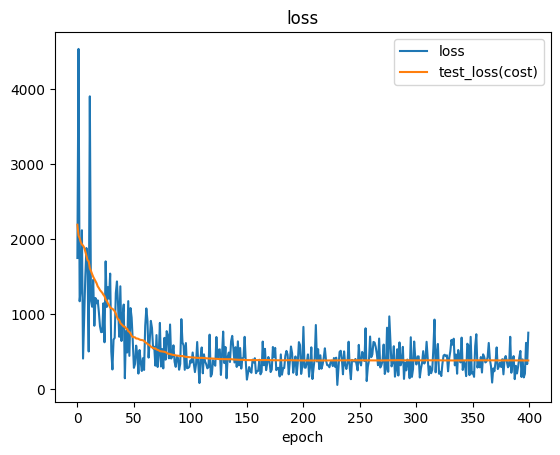

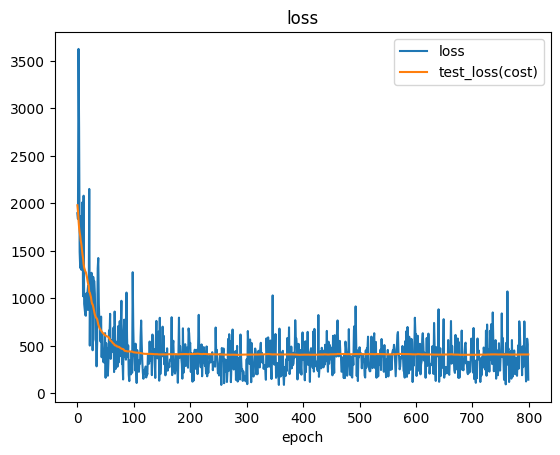

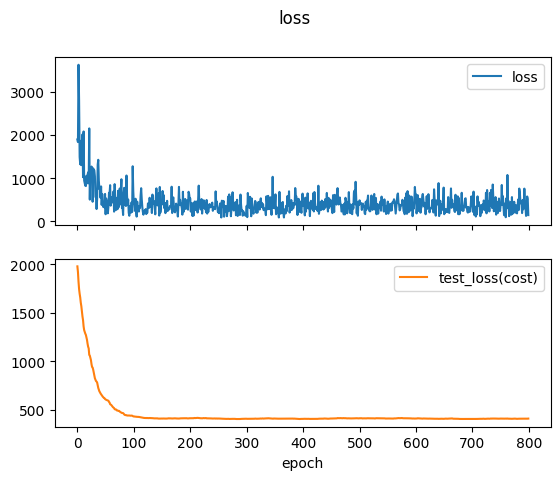

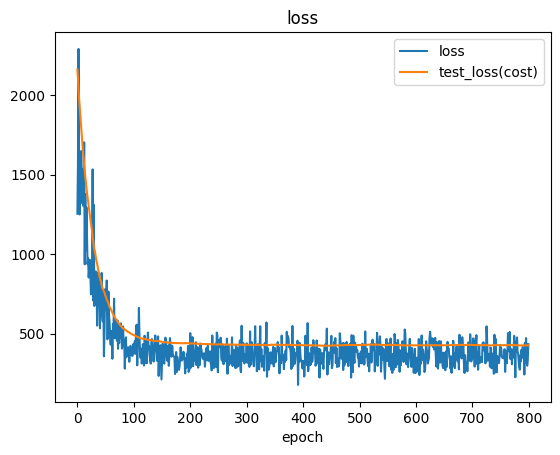

In [15]:
fig = plt.figure(figsize=(10, 10))
log_e400_lr0_01_bs10_random.plot(y=['loss', 'test_loss(cost)'], title='loss')
log_e800_lr0_01_bs10_random.plot(y=['loss', 'test_loss(cost)'], title='loss')
log_e800_lr0_01_bs10_random.plot(y=['loss', 'test_loss(cost)'], title='loss', subplots=True)
log_e800_lr0_01_bs50_random.plot(y=['loss', 'test_loss(cost)'], title='loss')

['', '-0.42504861', '40.3826155', '', '', '0.22218106']
['-0.42504861', '40.3826155', '0.22218106']
[-0.42504861 40.3826155   0.22218106]


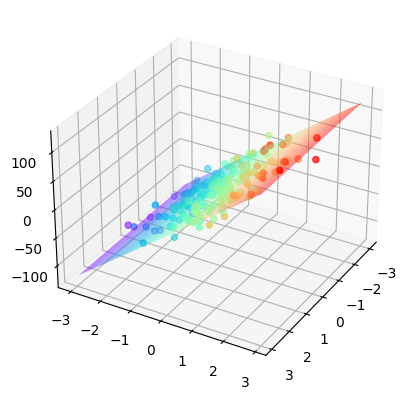

In [20]:
# 3维可视化原数据散点和拟合超平面
data_pandas = pandas.read_csv('data/linreg-data.csv', index_col=0)
# 3维可视化原数据散点，点的颜色根据y值的大小变化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_pandas['x1'], data_pandas['x2'], data_pandas['y'], c=data_pandas['y'], marker='o', cmap='rainbow')
# 画测试集散点图
ax.scatter(dataset.test_data[:, 0], dataset.test_data[:, 1], dataset.test_data[:, 3], c=dataset.test_data[:,1], marker='o', cmap='rainbow')
## 在fig上画出超平面
# 从[-0.15518813 39.07794971]中读取两个数值
w_b10_str =log_e800_lr0_01_bs10_random['wight'].iloc[-1]
print(w_b10_str.replace('[', '').replace(']', '').split(' '))
# 删除""成员
w_b10_str = [x for x in w_b10_str.replace('[', '').replace(']', '').split(' ') if x != '']
print(w_b10_str)
w_b10 = numpy.array(w_b10_str, dtype=float)
print(w_b10)
X1_b10 = numpy.arange(-3, 3, 0.1)
X2_b10 = numpy.arange(-3, 3, 0.1)

# Y_b10 = ( X1_b10 * w_b10[0] + w_b10[1] * X2_b10 + b_b10)
X1_b10, X2_b10 = numpy.meshgrid(X1_b10, X2_b10)
Y_b10 = X1_b10 * w_b10[0] + w_b10[1] * X2_b10 + w_b10[2]

surf = ax.plot_surface(X1_b10, X2_b10, Y_b10, cmap='rainbow', alpha=0.5)

# 设置坐标轴旋转角度
ax.view_init(elev=30, azim=30)

plt.show()

# ax.scatter(data_pandas['x1'], data_pandas['x2'], data_pandas['y'], c='y', marker='o')

# data_pandas.plot.scatter(x='x1', y='x2', c='y', colormap='viridis')

['', '-0.42504861', '40.3826155', '', '', '0.22218106']
['-0.42504861', '40.3826155', '0.22218106']
[-0.42504861 40.3826155   0.22218106]


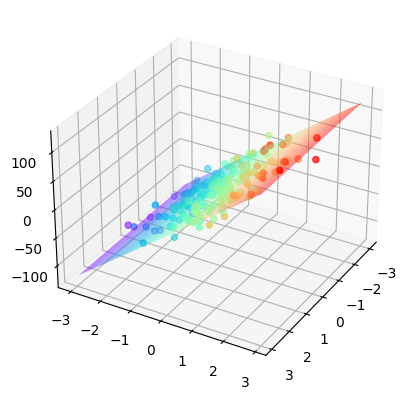

In [22]:
# 3维可视化原数据散点和拟合超平面
data_pandas = pandas.read_csv('data/linreg-data.csv', index_col=0)
# 3维可视化原数据散点，点的颜色根据y值的大小变化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_pandas['x1'], data_pandas['x2'], data_pandas['y'], c=data_pandas['y'], marker='o', cmap='rainbow')
# 画测试集散点图
ax.scatter(dataset.test_data[:, 0], dataset.test_data[:, 1], dataset.test_data[:, 3], c=dataset.test_data[:,1], marker='o', cmap='rainbow')
## 在fig上画出超平面
# 从[-0.15518813 39.07794971]中读取两个数值
w_b10_str =log_e800_lr0_01_bs10_random['wight'].iloc[-1]
print(w_b10_str.replace('[', '').replace(']', '').split(' '))
# 删除""成员
w_b10_str = [x for x in w_b10_str.replace('[', '').replace(']', '').split(' ') if x != '']
print(w_b10_str)
w_b10 = numpy.array(w_b10_str, dtype=float)
print(w_b10)
X1_b10 = numpy.arange(-3, 3, 0.1)
X2_b10 = numpy.arange(-3, 3, 0.1)

# Y_b10 = ( X1_b10 * w_b10[0] + w_b10[1] * X2_b10 + b_b10)
X1_b10, X2_b10 = numpy.meshgrid(X1_b10, X2_b10)
Y_b10 = X1_b10 * w_b10[0] + w_b10[1] * X2_b10 + w_b10[2]

surf = ax.plot_surface(X1_b10, X2_b10, Y_b10, cmap='rainbow', alpha=0.5)

# 设置坐标轴旋转角度
ax.view_init(elev=30, azim=30)

plt.show()
